In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
X = load_boston().data
Y = load_boston().target

In [3]:
X_tr, X_te, y_tr, y_te = train_test_split(X, Y, test_size=.33)

In [4]:
scaler = preprocessing.StandardScaler().fit(X_tr)
X_tr = scaler.transform(X_tr)
X_te = scaler.transform(X_te)

## 1. Custom SGD implementation

In [5]:
from CustomSGD import CustomSGDLinearRegressor

In [6]:
model = CustomSGDLinearRegressor(learning_rate = .5, iters = 1000, k_rand_points = 200)

### 1.1 Finding best weights using <font color='red'>CustomSGD</font>

In [20]:
model.fit(X_tr, y_tr)

print('Custom SGD Weights:\n\n', model.w)

print('\nCustom SGD MSE:', mean_squared_error(y_te, model.predict(X_te)))

Custom SGD Weights:

 [-1.37935448  0.99859636 -0.114248    1.20450027 -1.09328261  2.40638725
  0.29268526 -3.41559631  2.15896609 -1.41222719 -1.59303017  1.278064
 -4.34367079]

Custom SGD MSE: 22.1897005988024


### 1.2 Plotting Actual vs Predicted values for CustomSGD

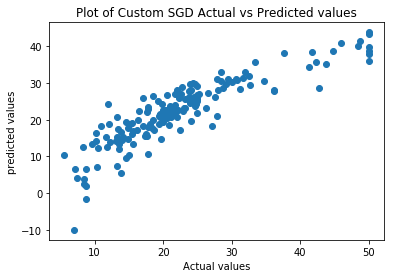

In [21]:
plt.scatter(y_te, model.predict(X_te))
plt.xlabel('Actual values')
plt.ylabel('predicted values')
plt.title('Plot of Custom SGD Actual vs Predicted values')
plt.show()

## 2. SKLearn SGDRegressor

In [9]:
clf = SGDRegressor()

### 2.1 Finding best weights using SKLearn SGDRegressor

In [22]:
clf.fit(X_tr, y_tr)

print('SKLearn\'s SGD Regressor Weights:\n\n', clf.coef_)

print('\nSKLearn\'s SGD Regressor MSE:', mean_squared_error(y_te, clf.predict(X_te)))

SKLearn's SGD Regressor Weights:

 [-0.51695928  0.89414106 -0.54861508  0.84693959 -0.62858144  2.49865026
 -0.29972672 -2.02129005  0.87170217 -0.25263673 -1.64586209  0.81239964
 -3.31961722]

SKLearn's SGD Regressor MSE: 22.398904939024018


### 1.2 Plotting Actual vs Predicted values for SKLearn SGDRegressor

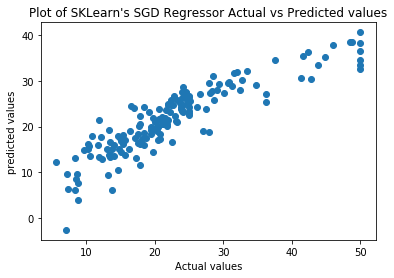

In [23]:
plt.scatter(y_te, clf.predict(X_te))
plt.xlabel('Actual values')
plt.ylabel('predicted values')
plt.title('Plot of SKLearn\'s SGD Regressor Actual vs Predicted values')
plt.show()

## 3. Weights of SGDRegressor vs CustomSGD

In [24]:
pt = PrettyTable()
pt.field_names = ['Component of Weight', 'SKLearn SGDRegressor', 'Custom SGD']

for idx, weights in enumerate(zip(clf.coef_, model.w)):
    pt.add_row([ idx+1, *weights ])

print(pt)

+---------------------+----------------------+----------------------+
| Component of Weight | SKLearn SGDRegressor |      Custom SGD      |
+---------------------+----------------------+----------------------+
|          1          | -0.5169592832220216  |  -1.379354478331243  |
|          2          |  0.8941410617276283  |  0.9985963626512844  |
|          3          | -0.5486150818260449  | -0.11424800368182365 |
|          4          |  0.8469395882328191  |  1.2045002670428566  |
|          5          | -0.6285814400331171  | -1.0932826119382444  |
|          6          |  2.4986502575853407  |  2.406387252072848   |
|          7          |  -0.299726720265442  |  0.2926852574921284  |
|          8          |  -2.021290046557436  | -3.4155963060673042  |
|          9          |  0.8717021748557996  |  2.158966093446805   |
|          10         | -0.2526367253954559  | -1.4122271917712101  |
|          11         |  -1.645862090068674  | -1.5930301708208308  |
|          12       

## 4. Mean Squared Error of SGDRegressor vs CustomSGD

In [25]:
pt = PrettyTable()

pt.field_names = ['Metric', 'SKLearn SGDRegressor', 'Custom SGDLinearRegressor']

pt.add_row(['MSE', mean_squared_error(y_te, clf.predict(X_te)), mean_squared_error(y_te, model.predict(X_te))])

print(pt)

+--------+----------------------+---------------------------+
| Metric | SKLearn SGDRegressor | Custom SGDLinearRegressor |
+--------+----------------------+---------------------------+
|  MSE   |  22.398904939024018  |      22.1897005988024     |
+--------+----------------------+---------------------------+
